In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_mushroom = pd.read_csv("mushroom.csv")
print(df_mushroom)

     type cap-shape cap-surface cap-color bruises odor gill-attachment  \
0       p         x           s         n       t    p               f   
1       e         x           s         y       t    a               f   
2       e         b           s         w       t    l               f   
3       p         x           y         w       t    p               f   
4       e         x           s         g       f    n               f   
...   ...       ...         ...       ...     ...  ...             ...   
8119    e         k           s         n       f    n               a   
8120    e         x           s         n       f    n               a   
8121    e         f           s         n       f    n               a   
8122    p         k           y         n       f    y               f   
8123    e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n          k 

In [3]:
df_mushroom.head()

,type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df_mushroom.isnull().sum()

type                        0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df_mushroom.dtypes

type                        object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

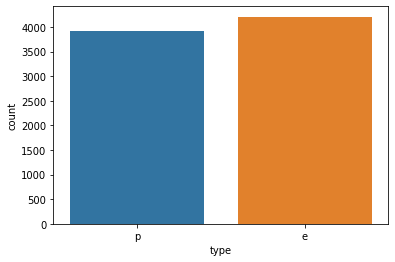

In [6]:
sns.countplot(x="type",data=df_mushroom)
plt.show()

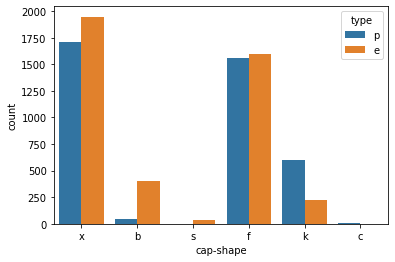

In [10]:
sns.countplot(x="cap-shape",hue="type",data=df_mushroom)
plt.show()

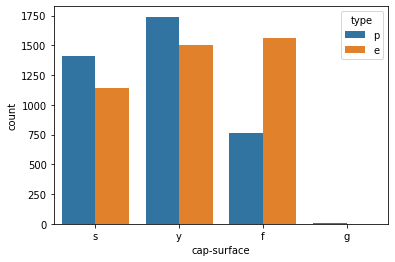

In [11]:
sns.countplot(x="cap-surface",hue="type",data=df_mushroom)
plt.show()

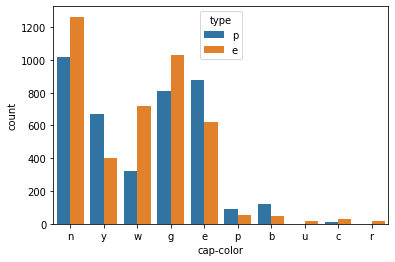

In [12]:
sns.countplot(x="cap-color",hue="type",data=df_mushroom)
plt.show()

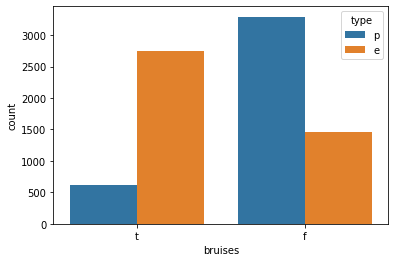

In [13]:
sns.countplot(x="bruises",hue="type",data=df_mushroom)
plt.show()

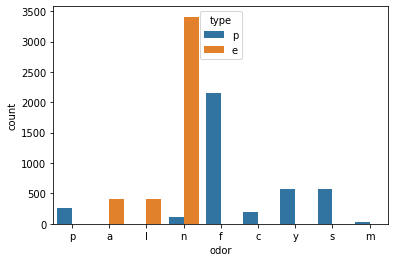

In [14]:
sns.countplot(x="odor",hue="type",data=df_mushroom)
plt.show()

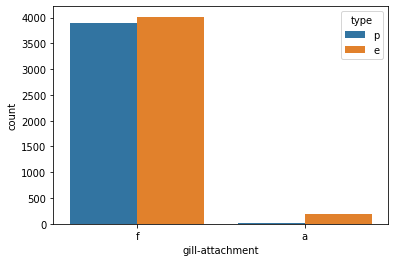

In [15]:
sns.countplot(x="gill-attachment",hue="type",data=df_mushroom)
plt.show()

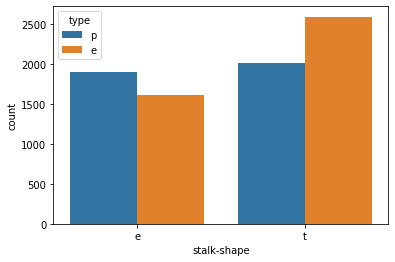

In [16]:
sns.countplot(x="stalk-shape",hue="type",data=df_mushroom)
plt.show()

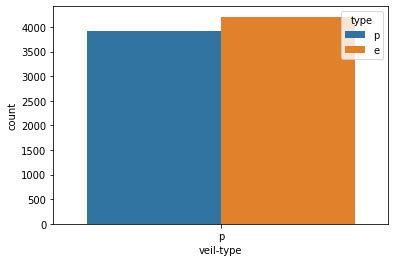

In [17]:
sns.countplot(x="veil-type",hue="type",data=df_mushroom)
plt.show()

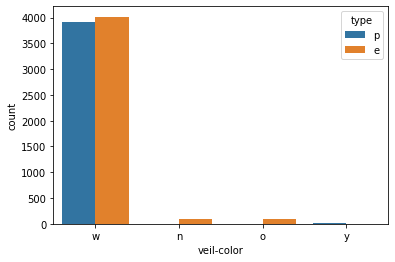

In [18]:
sns.countplot(x="veil-color",hue="type",data=df_mushroom)
plt.show()

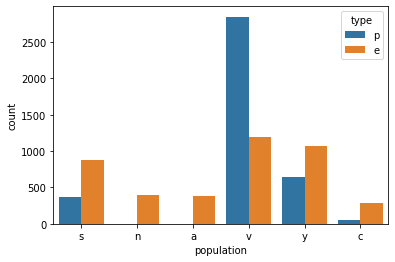

In [20]:
sns.countplot(x="population",hue="type",data=df_mushroom)
plt.show()

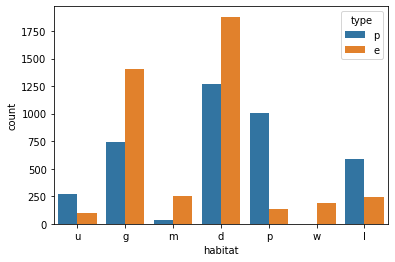

In [21]:
sns.countplot(x="habitat",hue="type",data=df_mushroom)
plt.show()

In [22]:
df_mushroom.drop(columns=["veil-color"],inplace=True)

In [24]:
df_x=df_mushroom.drop(columns=["type"])
df_y=df_mushroom[["type"]]

In [25]:
df_x=pd.get_dummies(df_x,drop_first=True)

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_x)
x=sc.transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df_y)
df_y=le.transform(df_y)
df_y

array([1, 0, 0, ..., 0, 1, 0])

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y, test_size=0.2, random_state=42)

In [41]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,df_x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        print("random state :",r_state," and f1 score: ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

In [65]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
final_r_state=maxf1_score(lg,df_x,df_y)

random state : 42  and f1 score:  0.9987212276214833
random state : 43  and f1 score:  0.9993610223642173
random state : 44  and f1 score:  0.9980806142034548
random state : 45  and f1 score:  1.0
random state : 46  and f1 score:  1.0
random state : 47  and f1 score:  1.0
random state : 48  and f1 score:  0.9993610223642173
random state : 49  and f1 score:  1.0
random state : 50  and f1 score:  0.9993610223642173
random state : 51  and f1 score:  1.0
random state : 52  and f1 score:  1.0
random state : 53  and f1 score:  1.0
random state : 54  and f1 score:  0.9980806142034548
random state : 55  and f1 score:  1.0
random state : 56  and f1 score:  1.0
random state : 57  and f1 score:  0.9993610223642173
random state : 58  and f1 score:  1.0
random state : 59  and f1 score:  0.9980806142034548
random state : 60  and f1 score:  1.0
random state : 61  and f1 score:  0.9993610223642173
random state : 62  and f1 score:  0.9993610223642173
random state : 63  and f1 score:  1.0
random state :

In [50]:
from sklearn.model_selection import cross_val_score
print("Mean f1 score ",cross_val_score(lg,df_x,df_y,cv=5,scoring="f1").mean())
print(cross_val_score(lg,df_x,df_y,cv=5,scoring="f1"))

Mean f1 score  0.9063614592722835
[0.82634731 1.         0.97980456 1.         0.72565543]


In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
maxf1_score(knn,df_x,df_y)

random state : 42  and f1 score:  1.0
random state : 43  and f1 score:  1.0
random state : 44  and f1 score:  1.0
random state : 45  and f1 score:  1.0
random state : 46  and f1 score:  1.0
random state : 47  and f1 score:  1.0
random state : 48  and f1 score:  1.0
random state : 49  and f1 score:  1.0
random state : 50  and f1 score:  1.0
random state : 51  and f1 score:  1.0
random state : 52  and f1 score:  1.0
random state : 53  and f1 score:  1.0
random state : 54  and f1 score:  1.0
random state : 55  and f1 score:  1.0
random state : 56  and f1 score:  1.0
random state : 57  and f1 score:  1.0
random state : 58  and f1 score:  1.0
random state : 59  and f1 score:  1.0
random state : 60  and f1 score:  1.0
random state : 61  and f1 score:  1.0
random state : 62  and f1 score:  1.0
random state : 63  and f1 score:  1.0
random state : 64  and f1 score:  1.0
random state : 65  and f1 score:  1.0
random state : 66  and f1 score:  1.0
random state : 67  and f1 score:  1.0
random state

In [54]:
print("Mean f1 score ",cross_val_score(knn,df_x,df_y,cv=5,scoring="f1").mean())
print(cross_val_score(knn,df_x,df_y,cv=5,scoring="f1"))

Mean f1 score  0.9291006130315027
[0.80578827 1.         0.99550994 1.         0.84420485]


In [56]:
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
maxf1_score(dct,df_x,df_y)

random state : 42  and f1 score:  1.0
random state : 43  and f1 score:  1.0
random state : 44  and f1 score:  1.0
random state : 45  and f1 score:  1.0
random state : 46  and f1 score:  1.0
random state : 47  and f1 score:  1.0
random state : 48  and f1 score:  1.0
random state : 49  and f1 score:  1.0
random state : 50  and f1 score:  1.0
random state : 51  and f1 score:  1.0
random state : 52  and f1 score:  1.0
random state : 53  and f1 score:  1.0
random state : 54  and f1 score:  1.0
random state : 55  and f1 score:  1.0
random state : 56  and f1 score:  1.0
random state : 57  and f1 score:  1.0
random state : 58  and f1 score:  1.0
random state : 59  and f1 score:  1.0
random state : 60  and f1 score:  1.0
random state : 61  and f1 score:  1.0
random state : 62  and f1 score:  1.0
random state : 63  and f1 score:  1.0
random state : 64  and f1 score:  1.0
random state : 65  and f1 score:  1.0
random state : 66  and f1 score:  1.0
random state : 67  and f1 score:  1.0
random state

In [59]:
print("Mean f1 score ",cross_val_score(dct,df_x,df_y,cv=5,scoring="f1").mean())
print(cross_val_score(dct,df_x,df_y,cv=5,scoring="f1"))

Mean f1 score  0.938001116694584
[0.80487805 1.         1.         1.         0.8569857 ]


In [60]:
from sklearn.svm import SVC
svc=SVC()
maxf1_score(svc,df_x,df_y)

random state : 42  and f1 score:  0.9961538461538463
random state : 43  and f1 score:  0.9987212276214833
random state : 44  and f1 score:  0.9961538461538463
random state : 45  and f1 score:  0.9974391805377721
random state : 46  and f1 score:  0.9993610223642173
random state : 47  and f1 score:  0.9955099422706863
random state : 48  and f1 score:  0.9987212276214833
random state : 49  and f1 score:  0.9955099422706863
random state : 50  and f1 score:  0.9980806142034548
random state : 51  and f1 score:  0.9980806142034548
random state : 52  and f1 score:  0.9974391805377721
random state : 53  and f1 score:  0.9974391805377721
random state : 54  and f1 score:  0.9955099422706863
random state : 55  and f1 score:  0.9980806142034548
random state : 56  and f1 score:  0.9987212276214833
random state : 57  and f1 score:  0.9967969250480461
random state : 58  and f1 score:  0.993573264781491
random state : 59  and f1 score:  0.9980806142034548
random state : 60  and f1 score:  0.99743918053

In [61]:
print("Mean f1 score ",cross_val_score(svc,df_x,df_y,cv=5,scoring="f1").mean())
print(cross_val_score(svc,df_x,df_y,cv=5,scoring="f1"))

Mean f1 score  0.8718342690231744
[0.71369975 0.99936102 0.93396869 1.         0.71214188]


In [63]:
#Using DCT
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,random_state = 42,test_size=0.20)
dct.fit(x_train,y_train)
y_pred=dct.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[843   0]
 [  0 782]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

